# Covid-19 Vaccine Allocations and Case Counts Analysis
----

Written in the Python 3.7.9 Environment

By Tarak Patel, Nicole Lund and Anne Niemiec.

Common Jupyter cells have been notated for ease of merging after individuals their analysis.

Individual working files will be merged using https://pypi.org/project/nbmerge/

In [2]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load Dependencies

# Data Organization & Collection
import pandas as pd
import requests
import json
from census import Census

# Data Visualization & Analysis
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import gmaps

# General Navigation
import time
import os
import sys

In [3]:
# Define users api key file folder location
api_key_path = r"C:\Users\nlund\Documents\GitHub\untracked_files"

In [4]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Add API key file to system path
# sys.path.append(api_key_path)

# # Import Census API Key
# from untracked_api_keys import census_key
# c = Census(census_key, year=2019)

# # Import Google API key
# from untracked_api_keys import g_key

In [5]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Case and Death Counts by state and time
    # This data combines:
        # United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv'
        # state_code.csv

c_d_withstate_df_path = r"..\data_manipulation\clean_data\c_d_withstate_df.csv"
cases_deaths_df = pd.read_csv(c_d_withstate_df_path)
cases_deaths_df.head()


,state_name,state_code,date,day_num,total_cases,confirmed_cases,probable_cases,new_cases,pnew_cases,total_deaths,confirmed_deaths,probable_deaths,new_deaths,pnew_deaths,consent_cases,consent_deaths,created_at
0,Alaska,AK,12/14/2020,0,40160,0.0,0.0,422,0.0,175,0.0,0.0,0,0.0,0,0,12/15/2020 14:39
1,Alabama,AL,12/14/2020,0,297895,244762.0,53133.0,2264,332.0,4102,3624.0,478.0,0,0.0,Agree,Agree,12/15/2020 14:39
2,Arkansas,AR,12/14/2020,0,187057,0.0,0.0,1355,122.0,2990,0.0,0.0,45,22.0,Not agree,Not agree,12/15/2020 14:39
3,American Samoa,AS,12/14/2020,0,3,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,12/15/2020 14:39
4,Arizona,AZ,12/14/2020,0,420248,404294.0,15954.0,11806,503.0,7358,6782.0,576.0,1,-2.0,Agree,Agree,12/15/2020 14:39


In [6]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for Vaccination Allocation Data by state and time
    # This data combines:
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Pfizer.csv
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv
        # COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Janssen.csv

Combined_Vaccine_df_path = r"..\data_manipulation\clean_data\Combined_Vaccine_df.csv"
vaccine_allocation_df = pd.read_csv(Combined_Vaccine_df_path)
vaccine_allocation_df.head()


,state_name,state_code,date,day_num,pfe_dose_1,pfe_dose_2,mrna_dose_1,mrna_dose_2,jnj_dose_1
0,Connecticut,CT,04/19/2021,126,54990,54990,40400.0,40400.0,0.0
1,Maine,ME,04/19/2021,126,21060,21060,15400.0,15400.0,0.0
2,Massachusetts,MA,04/19/2021,126,105300,105300,77700.0,77700.0,0.0
3,New Hampshire,NH,04/19/2021,126,21060,21060,15500.0,15500.0,0.0
4,Rhode Island,RI,04/19/2021,126,16380,16380,12100.0,12100.0,0.0


In [7]:
### This is a common Jupyter Cell.  Do not modify without coordination. ###

# Load clean data for State Population from Census reports
    # This data collects census API request data by state:
        # Population.csv

Population_path = r"..\data_manipulation\clean_data\Population.csv"
census_df = pd.read_csv(Population_path)
census_df.head()


,state_name,state_code,population,median_age,household_income,per_capita_income,poverty_count,poverty_rate,unemployment_count,unemployment_rate
0,Alabama,AL,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,132095.0,2.708946
1,Alaska,AK,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,26808.0,3.637114
2,Arizona,AZ,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,195905.0,2.778676
3,Arkansas,AR,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,70481.0,2.349860
4,California,CA,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,1199233.0,3.052765


# Group 2 Analysis

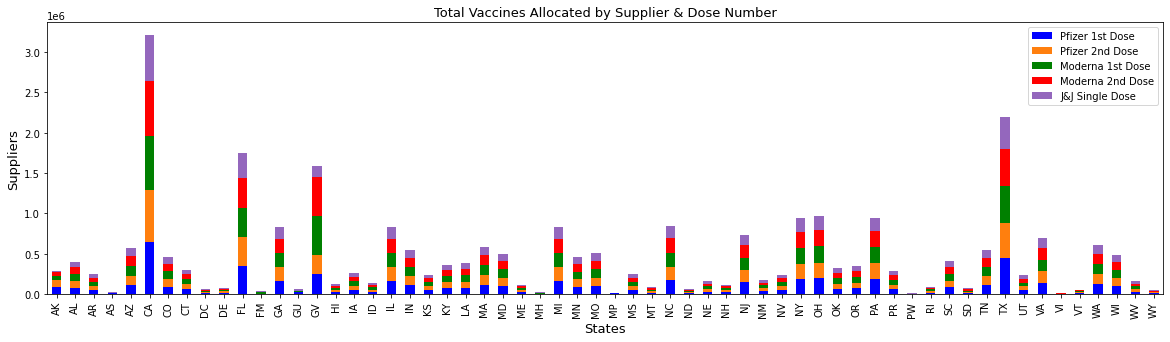

In [8]:
### Group 2 Charts authored by Anne Niemiec

#Fig1: Stacked Bar Plot showing Vaccine Allocations by State on latest date present in the data

# * x-axis = State

# * y-axis = 
#     * Bar 1: Pfizer cumulative 1st dose allocation
#     * Bar 2: Pfizer cumulative 2nd dose allocation
#     * Bar 3: Moderna cumulative 1st dose allocation
#     * Bar 4: Moderna cumulative 2nd dose allocation
#     * Bar 5: Johnson & Johnson cumulative single dose allocation

# rename dataframe and groupby specific columns
state_code_df=vaccine_allocation_df.groupby(["state_code"]).max()
state_code_wo_day_num=state_code_df[["pfe_dose_1","pfe_dose_2","mrna_dose_1","mrna_dose_2","jnj_dose_1"]]

# plotting
state_code_wo_day_num.plot(kind='bar', figsize=(20,5),stacked=True, color=['b', 'tab:orange', 'g', 'r', 'tab:purple'])

# formatting labels, title, legend
plt.title("Total Vaccines Allocated by Supplier & Dose Number",fontsize=13)
plt.xlabel("States", fontsize=13)
plt.ylabel("Suppliers",fontsize=13)
legend=plt.legend()
legend.get_texts()[0].set_text('Pfizer 1st Dose')
legend.get_texts()[1].set_text('Pfizer 2nd Dose')
legend.get_texts()[2].set_text('Moderna 1st Dose')
legend.get_texts()[3].set_text('Moderna 2nd Dose')
legend.get_texts()[4].set_text('J&J Single Dose')


plt.savefig("allocations_state.png")
plt.show()

Commentary: In this figure, the states are NOT normalized by population, therefore, it reflects a higher number of allocation for states including CA, FL, TX) that have a high population value.

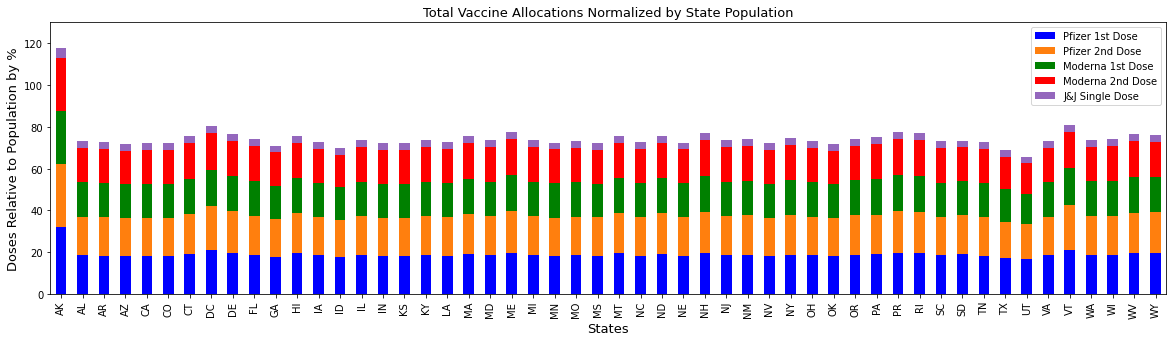

In [9]:
# Fig2: Stacked Bar Plot showing Vaccine Allocations Normalized by State Population by State on latest date present in the data

# * x-axis = State

# * y-axis = 
#     * Bar 1: Pfizer cumulative 1st dose allocation / State Population
#     * Bar 2: Pfizer cumulative 2nd dose allocation / State Population
#     * Bar 3: Moderna cumulative 1st dose allocation / State Population
#     * Bar 4: Moderna cumulative 2nd dose allocation / State Population
#     * Bar 5: Johnson & Johnson cumulative single dose allocation / State Population 

# merging datasets
state_sum=vaccine_allocation_df.groupby(["state_code"]).sum().reset_index()
combined_max_date=state_sum.merge(census_df, on='state_code',how='inner')

# columns to reference
combined_max_date["pfe_dose_1"]=100*(combined_max_date["pfe_dose_1"]/combined_max_date["population"])
combined_max_date["pfe_dose_2"]=100*(combined_max_date["pfe_dose_2"]/combined_max_date["population"])
combined_max_date["mrna_dose_1"]=100*(combined_max_date["mrna_dose_1"]/combined_max_date["population"])
combined_max_date["mrna_dose_2"]=100*(combined_max_date["mrna_dose_2"]/combined_max_date["population"])
combined_max_date["jnj_dose_1"]=100*(combined_max_date["jnj_dose_1"]/combined_max_date["population"])

# # plotting
combined_max_date=combined_max_date.set_index("state_code")
combined_max_date[["pfe_dose_1","pfe_dose_2","mrna_dose_1","mrna_dose_2","jnj_dose_1"]].plot(kind='bar', figsize=(20,5),stacked=True,ylim=(0,130),color=['b', 'tab:orange', 'g', 'r', 'tab:purple'])

# formatting labels, title, legend
plt.title("Total Vaccine Allocations Normalized by State Population",fontsize=13)
plt.xlabel("States", fontsize=13)
plt.ylabel("Doses Relative to Population by %",fontsize=13)
legend=plt.legend()
legend.get_texts()[0].set_text('Pfizer 1st Dose')
legend.get_texts()[1].set_text('Pfizer 2nd Dose')
legend.get_texts()[2].set_text('Moderna 1st Dose')
legend.get_texts()[3].set_text('Moderna 2nd Dose')
legend.get_texts()[4].set_text('J&J Single Dose')

plt.savefig("normalized_population.png")
plt.show()

Commentary:  Whereas in this figure, once the population value is normalized, it portrays a more even allocation for all states with the exception of Utah and Alaska by percentage.    We believe the reasoning is based on X.  If the goal is to achieve vaccination for the entire population, the % value in the chart would equate to x%. The values are similar/same for Pfizer since the doses are automatically scheduled for you.  Maderna has fewer shots (doses 1 & 2) than Pfizer (doses 1 & 2).  Q:(1/3 should receive Pfizer, 1/3 Moderna, 1/3 J&J)

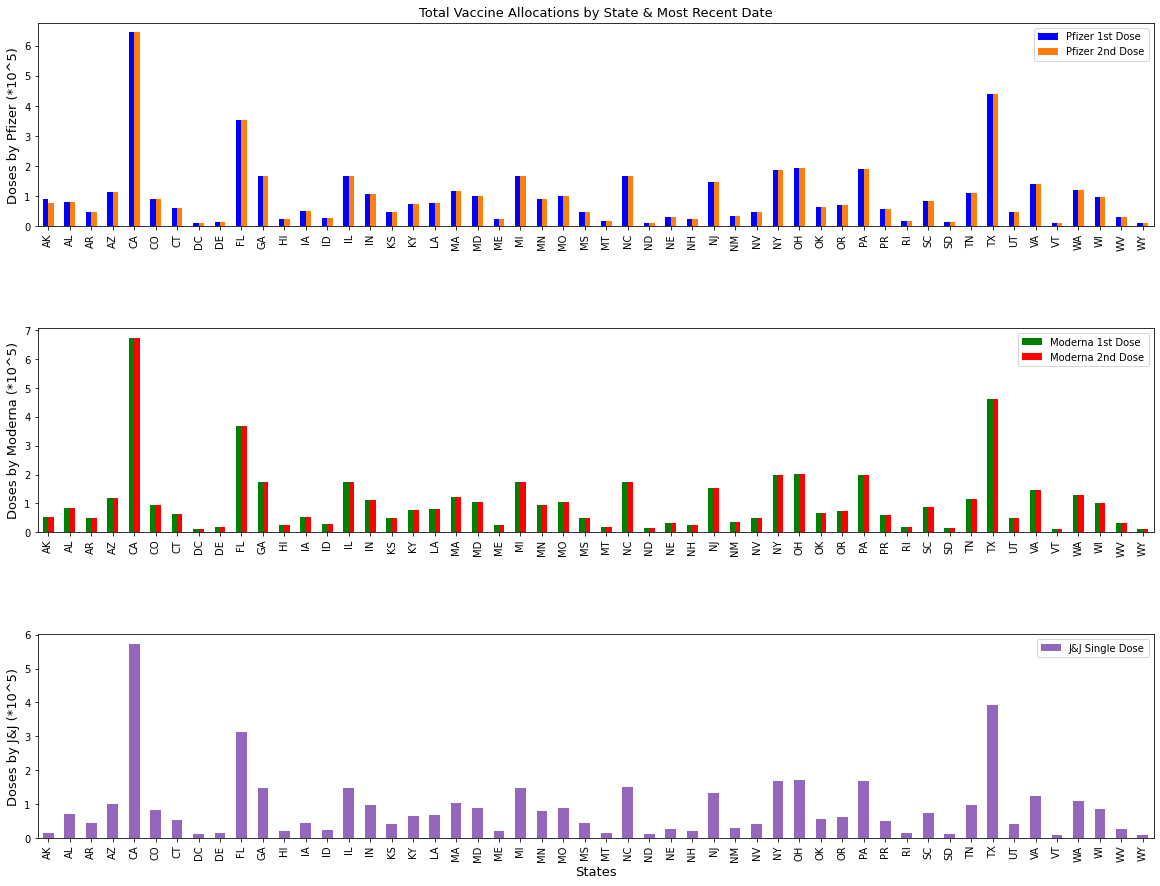

In [33]:
# Fig3: plot figure of Stacked Bar Plots showing Vaccine Allocations by State on latest date present in the data

# * x-axis = State
#     * Note, this is common to all 3 figures and should only be displayed on the bottom figure.

# * Plot 1, y-axis:
#     * Bar 1: Pfizer cumulative 1st dose allocation
#     * Bar 2: Pfizer cumulative 2nd dose allocation
# * Plot 2, y-axis:
#     * Bar 1: Moderna cumulative 1st dose allocation
#     * Bar 2: Moderna cumulative 2nd dose allocation
# * Plot 3, y-axis:
#     * Bar: Johnson & Johnson cumulative single dose allocation

# * Example implementation: https://matplotlib.org/2.0.2/examples/ticks_and_spines/spines_demo.html

# merging datasets
allocation_by_state_df=vaccine_allocation_df.merge(census_df, on='state_code',how='inner')
last_date_df=allocation_by_state_df.groupby(["state_code"]).max().reset_index()
state_last_date=last_date_df[["state_code", "day_num"]].merge(last_date_df,on=["state_code", "day_num"],how='left')

# adjusting values
state_last_date["pfe_dose_1"]=state_last_date["pfe_dose_1"]/100000
state_last_date["pfe_dose_2"]=state_last_date["pfe_dose_2"]/100000
state_last_date["mrna_dose_1"]=state_last_date["mrna_dose_1"]/100000
state_last_date["mrna_dose_2"]=state_last_date["mrna_dose_2"]/100000
state_last_date["jnj_dose_1"]=state_last_date["jnj_dose_1"]/100000

# # plotting (1,2,3)
state_last_date=state_last_date.set_index("state_code")
fig, axes = plt.subplots(nrows=3)
fig1=state_last_date[["pfe_dose_1","pfe_dose_2"]].plot(ax=axes[0],kind='bar', figsize=(20,15),color={'pfe_dose_1': 'b', 'pfe_dose_2':'tab:orange'})
fig2=state_last_date[["mrna_dose_1","mrna_dose_2"]].plot(ax=axes[1],kind='bar',color={'mrna_dose_1': 'g', 'mrna_dose_2':'r'},figsize=(20,15))
fig3=state_last_date[["jnj_dose_1"]].plot(ax=axes[2],kind='bar',color="tab:purple",figsize=(20,15))

# formatting labels, title
fig1.set_title("Total Vaccine Allocations by State & Most Recent Date",fontsize=13)
fig3.set_xlabel("States", fontsize=13)
fig1.set_ylabel("Doses by Pfizer (*10^5)",fontsize=13)
fig2.set_ylabel("Doses by Moderna (*10^5)",fontsize=13)
fig3.set_ylabel("Doses by J&J (*10^5)",fontsize=13)
fig1.set_xlabel("")
fig2.set_xlabel("")
legend=plt.legend()

#formatting legends
fig1.legend(["Pfizer 1st Dose", "Pfizer 2nd Dose"])
# plt.savefig("cummulative_allocations_state_1.png")
fig2.legend(["Moderna 1st Dose", "Moderna 2nd Dose"])
# plt.savefig("cummulative_allocations_state_2.png")
fig3.legend(["J&J Single Dose"])

plt.subplots_adjust(hspace=0.5)
plt.savefig("cummulative_allocations_state.png")
plt.show()

Commentary: Note, these images contain the number of total vaccines allocated by state. In figures 1 & 2, you will notice the bars mirror each other due to the fact that the patient is automatically scheduled for the 2nd dose (Pfizer & Moderna) at the time of receiving their first dose; hence the allocation for dose two is the same value as dose one. In the third figure, you only see one bar, since J&J is a single dose vaccine. However, it appears that CA has received a higher number of doses of moderna versus Pfizer and J&J.